In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.cm as cm
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import HTML
import io
import base64

In [2]:
## Define Functions
# Note: new functions will not form a volume generating movie

# Quadratic 'the one that is not a ball'
if False:
    def f(t):
        return t**2
    movie_name = "NotABall.mp4"

# cos 'pointy ball'
if True:
    def f(t):
        return np.cos(np.pi*t/2)
    movie_name = "PointyBall1.mp4"

# sqrt 'Tower'
if False:
    def f(t):
        return np.sqrt(1+t)
    movie_name = "Tower.mp4"

# Quadratic 'pointy ball'
if False:
    def f(t):
        return 1 - t**2
    movie_name = "PointyBall2.mp4"

# Sphere
if False:
    def f(t):
        return np.sqrt(1-t**2)
    movie_name = "Sphere.mp4"

# RainDrop
if False:
    def f(t):
        return -(t+1)*(t-1)*(1+np.sin(t))
    movie_name = "RainDrop.mp4"

# Decanter
if False:
    def f(t):
        return -(t+1)*(t-1)*(t**2 + t + 0.3)
    movie_name = "Decanter.mp4"

# Kind of like a spinning top
if False:
    def f(t):
        return (1.5 + np.cos(5*t))*(t+1)*(t-1)*(t-2)/3.
    movie_name = "SpinningTop.mp4"

In [3]:
## bin and plot settings
Ns = 15    # number of shells
Nt = 50    # number of angular points

In [4]:
## Create data
# No need to change

# create grid
s = np.linspace(-1, 1, Ns)
t = np.linspace( 0, 2*np.pi, Nt)
sGrid, tGrid = np.meshgrid(s, t, indexing='ij')

# create surface
y = sGrid
x = f(y)*np.cos(tGrid)
z = f(y)*np.sin(tGrid)

In [5]:
## make Riemann disks
X = np.zeros((2*Ns,Nt))
Y = np.zeros((2*Ns,Nt))
Z = np.zeros((2*Ns,Nt))

X[0,:] = x[0,:]
Y[0,:] = y[0,:]
Z[0,:] = z[0,:]

for ii in range(1,Ns):
    X[2*ii-1,:] = x[ii-1,:]
    X[2*ii,:]   = x[ii,:]
    Y[2*ii-1,:] = y[ii,:] - 1e-4
    Y[2*ii,:]   = y[ii,:] + 1e-4
    Z[2*ii-1,:] = z[ii-1,:]
    Z[2*ii,:]   = z[ii,:]

X[-1,:] = x[-1,:]
Y[-1,:] = y[-1,:]
Z[-1,:] = z[-1,:]

In [6]:
## Set-up surface outline (not necessarily used)

# create generating line
yline = s
xline = f(yline)

## Define the true solution
Ns2, Nt2 = 100, 100
s2 = np.linspace(-1, 1, Ns2)
t2 = np.linspace( 0, 2*np.pi, Nt2)
sGrid2, tGrid2 = np.meshgrid(s2, t2, indexing='ij')

# create surface
y2 = sGrid2
x2 = f(y2)*np.cos(tGrid2)*(1.02)
z2 = f(y2)*np.sin(tGrid2)*(1.02)

In [7]:
# play video
video = io.open(movie_name, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

<IPython.core.display.Javascript object>


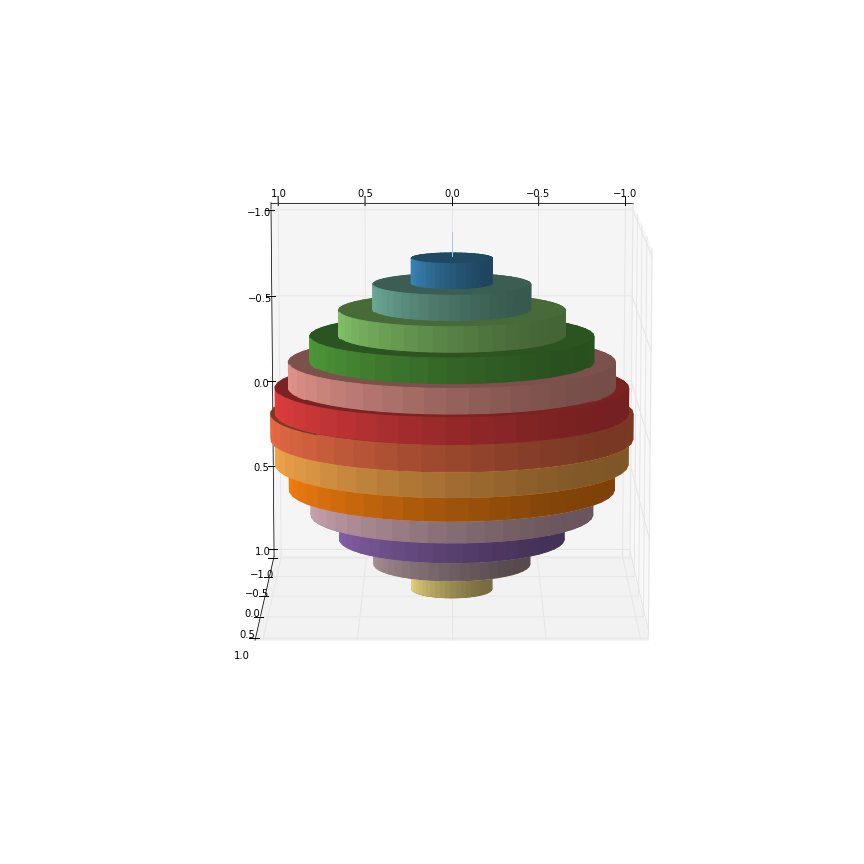

In [8]:
## Plotting

# create colormap
my_col  = cm.Paired((Y - Y.min())/(Y.max()-Y.min()))
my_col2 = cm.Paired((y2 - y2.min())/(y2.max()-y2.min()))

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=my_col)

# These turn on an outer 'shell'
#plot2 = ax.plot_surface(x2, y2, z2, rstride=10, cstride=10, facecolors=0*my_col2)
#plot2.set_edgecolors(np.array([0.,0.,0.,0.5]))

## This turns on an 'outline' line
#ax.plot(xline, yline)

ax.view_init(100,90)
ax.set_ylim3d((-1,1))
plt.show()

In [9]:
## Plotting
## Emphasize a specific 'washer'

# colormaps
my_col  = cm.Paired((Y - Y.min())/(Y.max()-Y.min()))
my_col3 = my_col.copy()
my_col2 = cm.Paired((y2 - y2.min())/(y2.max()-y2.min()))

my_col[:,:,-1] = 0.05   # transparency

binSel = int(0.25*Ns)   # which shell to emphasize
dyPerBin = (Y.max() - Y.min())/Ns
cut1 = Y[2*binSel,0]
cut2 = Y[2*binSel+1,0]

sSel = np.array([cut1-1e-3, cut1, cut2, cut2+1e-3])
fSel = np.array([0, X[2*binSel,0], X[2*binSel+1,0], 0])
tSel = np.linspace( 0, 2*np.pi, Nt)
fGridSel, tGridSel = np.meshgrid(fSel, tSel, indexing='ij')
sGridSel, tGridSel = np.meshgrid(sSel, tSel, indexing='ij')

ySel = sGridSel
xSel = fGridSel*np.cos(tGridSel)
zSel = fGridSel*np.sin(tGridSel)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=my_col)
ax.plot_surface(xSel, ySel, zSel, rstride=1, cstride=1, facecolors=my_col3)

ax.view_init(100,90)
ax.set_ylim3d((-1,1))

plt.show()

<IPython.core.display.Javascript object>